

# Investor Risk Tolerance and Robo advisors

The goal of this case study is to build a machine learning model to predict the risk tolerance or risk aversion of an investor, and use the model in a robo-advisor dashboard.


## Content

* [1. Problem Definition](#0)
* [2. Getting Started - Load Libraries and Dataset](#1)
    * [2.1. Load Libraries](#1.1)    
    * [2.2. Load Dataset](#1.2)
* [3. Data Preparation and Feature Selection](#2)
    * [3.1. Preparing the predicted variable](#2.1)    
    * [3.2. Feature Selection-Limit the Feature Space](#2.2)
* [4.Evaluate Algorithms and Models](#4)        
    * [4.1. Train/Test Split](#4.1)
    * [4.2. Test Options and Evaluation Metrics](#4.2)
    * [4.3. Compare Models and Algorithms](#4.3)
* [5. Model Tuning and Grid Search](#5)  
* [6. Finalize the Model](#6)  
    * [6.1. Results on test dataset](#6.1)
    * [6.2. Feature Importance](#6.1)
    * [6.2. Feature Intuition](#6.3)


<a id='0'></a>
# 1. Problem Definition

In the supervised regression framework used for this case study, the predicted variable
is the “true” risk tolerance of an individual10 and the predictor variables are demo‐
graphic, financial and behavioral attributes of an individual

For this case study the data used is from survey of Consumer Finances which is conducted by the Federal Reserve
Board. The data source is :
https://www.federalreserve.gov/econres/scf_2009p.htm

<a id='1'></a>
# 2. Getting Started- Loading the data and python packages

<a id='1.1'></a>
## 2.1. Loading the python packages

In [4]:
import subprocess
import sys

def check_and_install_libraries():
    libraries_info = {
        'numpy': "Support for large, multi-dimensional arrays and matrices.",
        'pandas': "Data manipulation and analysis library.",
        'pandas_datareader': "Remote data access for pandas.",
        'matplotlib': "Plotting library for creating static, animated, and interactive visualizations.",
        'seaborn': "Statistical data visualization based on matplotlib.",
        'scikit-learn': "Machine learning library for modeling and predictions.",
        'keras': "High-level neural networks API, running on top of TensorFlow.",
        'statsmodels': "Statistical modeling and econometrics in Python.",
        'imblearn': "Library for dealing with imbalanced dataset.",
        'xgboost': "Optimized distributed gradient boosting library.",
        'lightgbm': "Gradient boosting framework that uses tree-based learning algorithms.",
        'catboost': "Fast, scalable, high performance Gradient Boosting on decision trees.",
        'plotly': "Interactive graphing library for making interactive plots.",
        'psutil': "Cross-platform library for retrieving information on running processes and system utilization.",
        'tabulate': "Pretty-print tabular data in Python."
    }

    for lib, description in libraries_info.items():
        try:
            subprocess.check_call([sys.executable, '-m', 'pip', 'freeze'], stdout=subprocess.DEVNULL)
            subprocess.check_call([sys.executable, '-m', 'pip', 'install', lib])
            print(f"{lib} is installed. - {description}")
        except subprocess.CalledProcessError:
            print(f"Failed to install {lib}. Please install it manually.")

# Example usage
check_and_install_libraries()


numpy is installed. - Support for large, multi-dimensional arrays and matrices.
pandas is installed. - Data manipulation and analysis library.
pandas_datareader is installed. - Remote data access for pandas.
matplotlib is installed. - Plotting library for creating static, animated, and interactive visualizations.
seaborn is installed. - Statistical data visualization based on matplotlib.
scikit-learn is installed. - Machine learning library for modeling and predictions.
keras is installed. - High-level neural networks API, running on top of TensorFlow.
statsmodels is installed. - Statistical modeling and econometrics in Python.
imblearn is installed. - Library for dealing with imbalanced dataset.
xgboost is installed. - Optimized distributed gradient boosting library.
lightgbm is installed. - Gradient boosting framework that uses tree-based learning algorithms.
catboost is installed. - Fast, scalable, high performance Gradient Boosting on decision trees.
plotly is installed. - Interact

In [5]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import copy
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import LSTM
# from keras.wrappers.scikit_learn import KerasRegressor

#Libraries for Statistical Models
import statsmodels.api as sm

#Libraries for Saving the Model
from pickle import dump
from pickle import load

import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import copy
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import LSTM
# from keras.wrappers.scikit_learn import KerasRegressor

#Libraries for Statistical Models
import statsmodels.api as sm

#Libraries for Saving the Model
from pickle import dump
from pickle import load

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
import numpy as np


from imblearn.over_sampling import SMOTE
import pandas as pd

from sklearn.ensemble import StackingRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, BayesianRidge, SGDRegressor, ElasticNet
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import mean_squared_error, r2_score
from time import time
import numpy as np
import psutil  # To monitor memory usage, install with `pip install psutil`
import pandas as pd

import plotly.express as px

import time
import psutil
import os
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

from tabulate import tabulate

import plotly.graph_objects as go

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
from math import sqrt

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
import pandas as pd


from pickle import dump
from pickle import load

<a id='1.2'></a>
## 2.2. Loading the Data

In [6]:
# load dataset
dataset = pd.read_excel('/content/SCFP2009panel.xlsx')

In [7]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
type(dataset)

pandas.core.frame.DataFrame

In [9]:
dataset.shape

(19285, 515)

<a id='2'></a>
## 3. Data Preparation and Feature Selection

<a id='2.1'></a>
## 3.1. Preparing the predicted variable

The dataset from "Survey of Consumer Finances" contains the Household's demographics, net worth, financial and non-financial assets for the same demographics in 2007 (pre-crisis) and 2009(post-crisis).

We prepare the predicted variable, which is the "true" risk tolerance in the following steps. There are different ways of getting the "true" risk tolerance. The idea and the purpose of this case study is to come up with an approach to solve the behavioral finance problem using machine learning.

The steps to compute the predicted variables are as follows:

1) Compute the Risky asset and the riskless assets for all the individuals in the survey data. Risky and riskless assets are defined as follows:
* **Risky assets** is investments in mutual funds, stocks, bonds, commodities, and
real estate, and an estimate of human capital.
* **Risk Free Assets**: checking and savings balances,certificates of deposit, and other cash balances and equivalents.

2) We take the ratio of risky assets to total assets of an investor and consider that as a measure of risk tolerance of an investor. From the data of SCF, we have the data of risky and riskless assets for the individuals for 2007 and 2009. We use this data and normalise the risky assets with the stock price of 2007 vs. 2009 to get risk tolerance.

* **Risk Tolerance**  just defined as the ratio of Risky Asset to Riskless Assets normalised with the average S&P500 of 2007 vs 2009.
Average S&P500 in 2007: 1478
Average S&P500 in 2009: 948

3) In a lot of literature, an intelligent investor is the one who doesn't change its risk tolerance during the change in the market. So, we consider the investors who change their risk tolerance by less than 10% between 2007 and 2009 as the intelligent investors. Ofcourse this is a qualitative judgement and is subject to change. However, as mentioned before more than being accurate and precise the purpose of theis case study is to demonstrate the usage of the machine learning and provide a machine learning based framework in behavioral finance and portfolio management which can be further leveraged for more detailed analysis.

In [10]:
#Average SP500 during 2007 and 2009
Average_SP500_2007=1478
Average_SP500_2009=948

#Risk Tolerance 2007
dataset['RiskFree07']= dataset['LIQ07'] + dataset['CDS07'] + dataset['SAVBND07'] + dataset['CASHLI07']
dataset['Risky07'] = dataset['NMMF07'] + dataset['STOCKS07'] + dataset['BOND07']
dataset['RT07'] = dataset['Risky07']/(dataset['Risky07']+dataset['RiskFree07'])

#Risk Tolerance 2009
dataset['RiskFree09']= dataset['LIQ09'] + dataset['CDS09'] + dataset['SAVBND09'] + dataset['CASHLI09']
dataset['Risky09'] = dataset['NMMF09'] + dataset['STOCKS09'] + dataset['BOND09']
dataset['RT09'] = dataset['Risky09']/(dataset['Risky09']+dataset['RiskFree09'])*\
                (Average_SP500_2009/Average_SP500_2007)

In [11]:
dataset2 = copy.deepcopy(dataset)
dataset.head()

,YY1,Y1,WGT09,AGE07,AGECL07,EDUC07,EDCL07,MARRIED07,KIDS07,LIFECL07,...,TRANSFOTHINCPCT,PSAVINGPCT,LEVERAGEPCT,I,RiskFree07,Risky07,RT07,RiskFree09,Risky09,RT09
0,1,11,11668.134198,47,3,12,2,1,0,2,...,0.0,93.125197,270.403054,57,7994.813847,0.0,0.0,16000,17000,0.330422
1,1,12,11823.456494,47,3,12,2,1,0,2,...,0.0,93.125197,249.593620,57,7994.813847,0.0,0.0,19000,18000,0.312036
2,1,13,11913.228354,47,3,12,2,1,0,2,...,0.0,93.125197,209.233358,57,7984.457871,0.0,0.0,13000,12000,0.307876
3,1,14,11929.394266,47,3,12,2,1,0,2,...,0.0,93.125197,209.273158,57,7984.457871,0.0,0.0,25000,13000,0.219429
4,1,15,11917.722907,47,3,12,2,1,0,2,...,0.0,93.125197,232.690767,57,7994.813847,0.0,0.0,17000,12000,0.265410


Let us compute the percentage change in risk tolerance between 2007 and 2009.

In [12]:
dataset2['PercentageChange'] = np.abs(dataset2['RT09']/dataset2['RT07']-1)

Checking for the rows with null or nan values and removing them.

In [13]:
#Checking for any null values and removing the null values'''
print('Null Values =',dataset2.isnull().values.any())

Null Values = True


In [14]:
# Drop the rows containing NA
dataset2=dataset2.dropna(axis=0)

dataset2=dataset2[~dataset2.isin([np.nan, np.inf, -np.inf]).any(1)]

#Checking for any null values and removing the null values'''
print('Null Values =',dataset2.isnull().values.any())

Null Values = False


Let us plot the risk tolerance of 2007 and 2009.

<Axes: xlabel='RT07'>

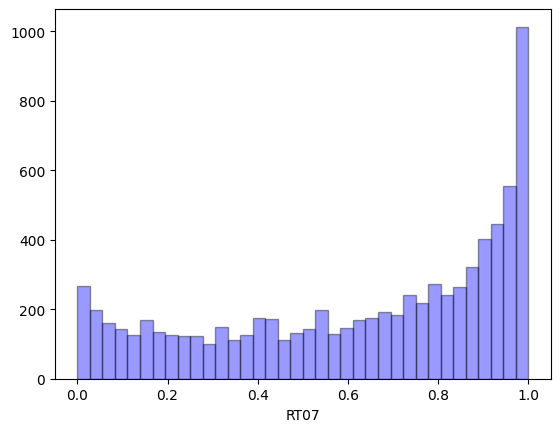

In [15]:
sns.distplot(dataset2['RT07'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

Looking at the risk tolerance of 2007, we see that a significant number of individuals had risk tolerance close to one.Meaning the investment ws more skewed towards the risky assets as compared to the riskless assets. Now let us look at the risk tolerance of 2009.

<Axes: xlabel='RT09'>

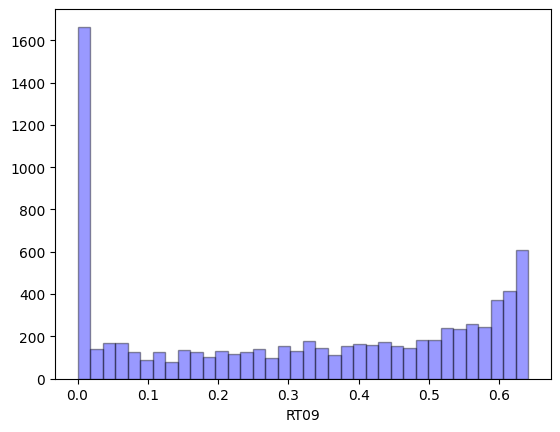

In [16]:
sns.distplot(dataset2['RT09'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

 Analysis of Age

<Axes: xlabel='AGE07'>

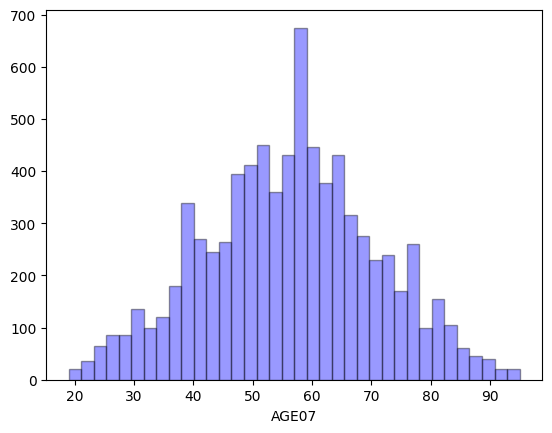

In [17]:
sns.distplot(dataset2['AGE07'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

Text(0.5, 1.0, 'Risk Tolerance vs Age in 2007')

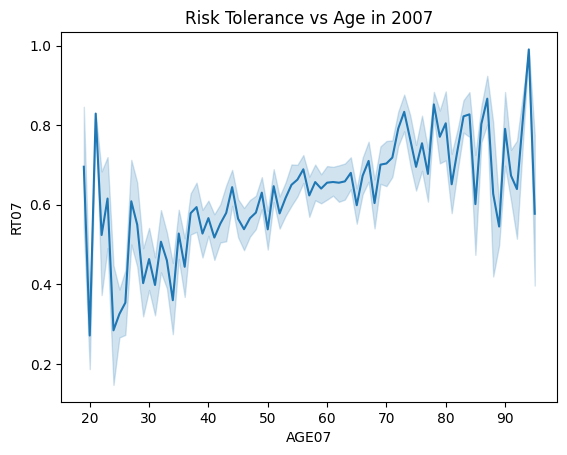

In [18]:
sns.lineplot(x='AGE07', y='RT07', data=dataset2)
plt.title('Risk Tolerance vs Age in 2007')

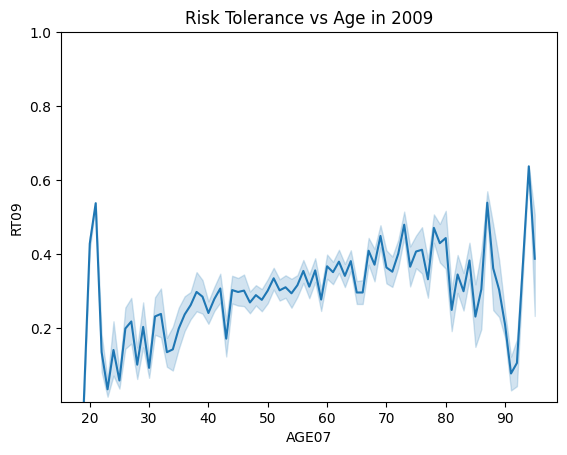

In [19]:


# Assuming dataset2 is your DataFrame and already loaded
sns.lineplot(x='AGE07', y='RT09', data=dataset2)
plt.title('Risk Tolerance vs Age in 2009')

# Setting the y-axis limits to be constant from 0.2 to 1.0
plt.ylim(0.0, 1.0)

# Optional: Setting y-axis ticks to be constant as per your requirement
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0])

plt.show()


as you can see in last 2 line plots(aboe) there is definete decrease in risk aong the portfolio across all ages

Text(0.5, 1.0, 'Joint plot: Risk Tolerance vs Age in 2007')

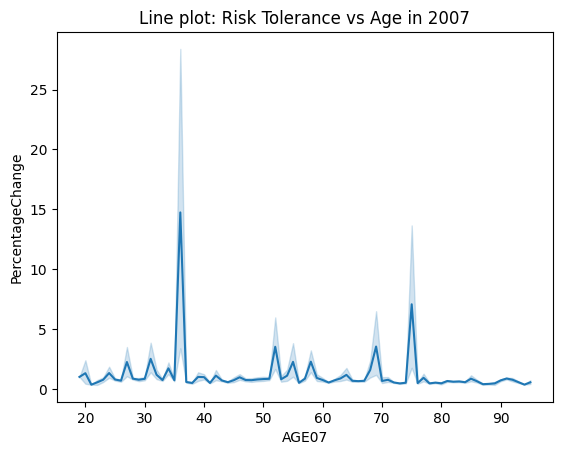

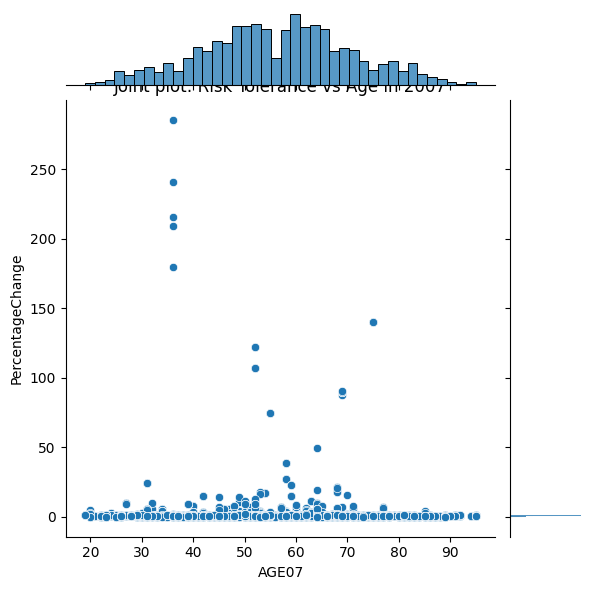

In [20]:
sns.lineplot(x='AGE07', y='PercentageChange', data=dataset2)
plt.title('Line plot: Risk Tolerance vs Age in 2007')

sns.jointplot(x='AGE07', y='PercentageChange', data=dataset2)
plt.title('Joint plot: Risk Tolerance vs Age in 2007')

not able to seperate the heading and the hisotgram in the above plot but this si very informative.

what i was trying ot see is which age group switched there investment portfolio the most, in simple langauage, for which age group the percent change was higher and we can see that people over 60 switched the most


also let me explain more, people who changed there portfolio with biggest magintude is people of age 30-40 but most number fo people who changes there portfolio are people 60+(from second plot)

In [21]:
def print_columns_in_chunks(df, chunk_size=10):
    columns = df.columns.tolist()
    for i in range(0, len(columns), chunk_size):
        print(columns[i:i+chunk_size])

# Example usage with your DataFrame
print_columns_in_chunks(dataset2, 10)


['YY1', 'Y1', 'WGT09', 'AGE07', 'AGECL07', 'EDUC07', 'EDCL07', 'MARRIED07', 'KIDS07', 'LIFECL07']
['FAMSTRUCT07', 'RACECL', 'H_RACECL', 'RACE', 'H_RACE', 'OCCAT107', 'OCCAT207', 'INDCAT07', 'HHEALTH07', 'SPHEALTH07']
['INCOME07', 'WAGEINC07', 'BUSSEFARMINC07', 'INTDIVINC07', 'KGINC07', 'SSRETINC07', 'TRANSFOTHINC07', 'PENACCTWD07', 'NORMINC07', 'RISK07']
['PSAVING07', 'WSAVED07', 'SAVED07', 'SAVRES1', 'SAVRES2', 'SAVRES3', 'SAVRES4', 'SAVRES5', 'SAVRES6', 'SAVRES7']
['SAVRES8', 'SAVRES9', 'SPENDMOR07', 'LATE6007', 'USPELL07', 'AGEFT07', 'AGEALL07', 'POSTRWORK07', 'RFULL07', 'BSHOPNONE07']
['BSHOPGRDL07', 'BSHOPMODR07', 'ISHOPNONE07', 'ISHOPGRDL07', 'ISHOPMODR07', 'BCALL07', 'BMAGZNEWS07', 'BMAILADTV07', 'BINTERNET07', 'BFRIENDWORK07']
['BFINPRO07', 'BSELF07', 'BDONT07', 'BOTHER07', 'ICALL07', 'IMAGZNEWS07', 'IMAILADTV07', 'IINTERNET07', 'IFRIENDWORK07', 'IFINPRO07']
['ISELF07', 'IDONT07', 'IOTHER07', 'BFINPLAN07', 'IFINPLAN07', 'APPLIED07', 'DENIED07', 'FULLAMT07', 'FEARED07', 'CHECKIN

Text(0.5, 1.0, 'Net Worth Category by Education Level in 2007')

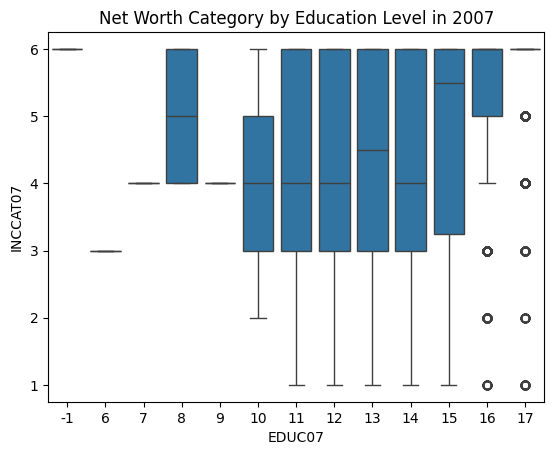

In [22]:
sns.boxplot(x='EDUC07', y='INCCAT07', data=dataset2)
plt.title('Net Worth Category by Education Level in 2007')



Text(0.5, 1.0, 'Income by Marital Status in 2007')

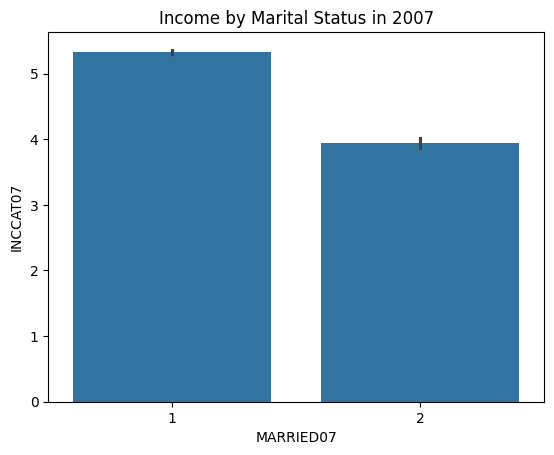

In [23]:
sns.barplot(x='MARRIED07', y='INCCAT07', data=dataset2)
plt.title('Income by Marital Status in 2007')


Mrried people tend to have more income

Text(0.5, 1.0, 'Income category dist by Marital Status in 2007')

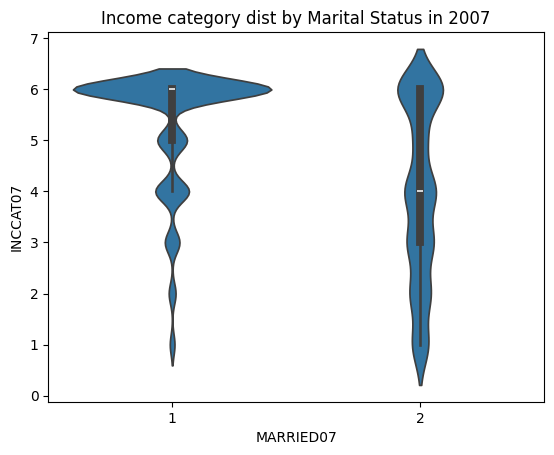

In [24]:
sns.violinplot(x='MARRIED07', y='INCCAT07', data=dataset2)
plt.title('Income category dist by Marital Status in 2007')

here we can see that for lower income level, unmarried peoeple do better but at higher income level, married peopel tend to do better.

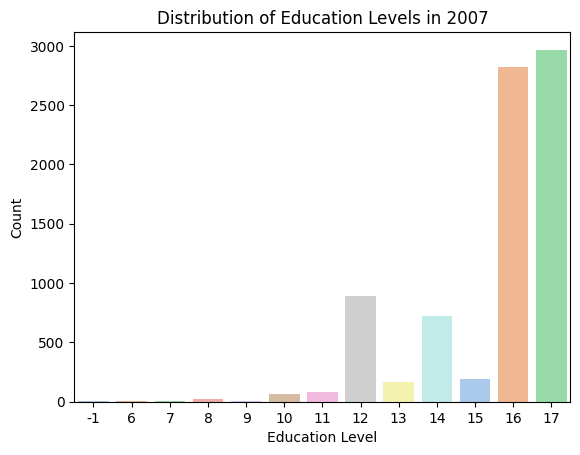

In [25]:

sns.countplot(x='EDUC07', data=dataset2, palette='pastel')
plt.title('Distribution of Education Levels in 2007')
plt.xlabel('Education Level')
plt.ylabel('Count')
# plt.xticks(ticks=[0, 1, 2, 3], labels=['No HS', 'Some HS', 'HS Grad', 'College'])
plt.show()


basically means there are more educated people

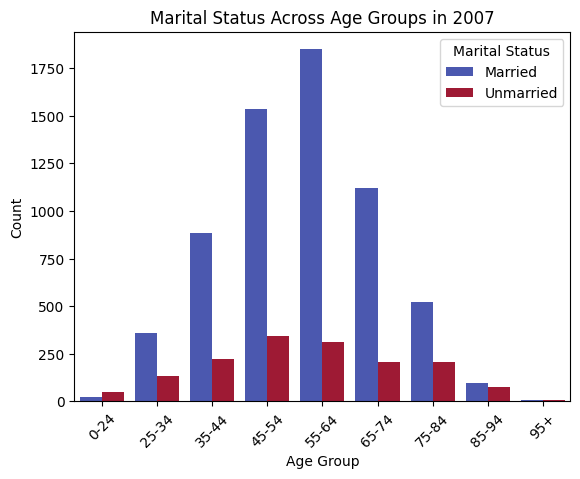

In [26]:
# Bin the AGE07 variable into categories
age_bins = [0, 25, 35, 45, 55, 65, 75, 85, 95, 105]
age_labels = ['0-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85-94', '95+']
dataset2['AgeGroup'] = pd.cut(dataset2['AGE07'], bins=age_bins, labels=age_labels, right=False)

# Now plot using these bins
sns.countplot(x='AgeGroup', hue='MARRIED07', data=dataset2, palette='coolwarm')
plt.title('Marital Status Across Age Groups in 2007')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Marital Status', labels=['Married', 'Unmarried'])
plt.xticks(rotation=45)  # Rotate labels to fit them better
plt.show()


Distribution of married vs unmarried across different age group

In [27]:
#

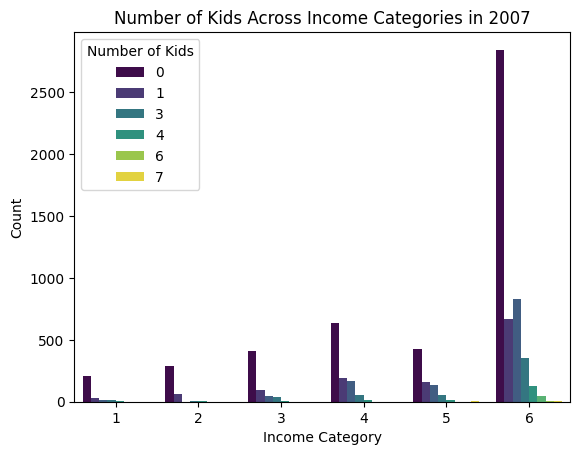

In [28]:
sns.countplot(x='INCCAT07', hue='KIDS07', data=dataset2, palette='viridis')
plt.title('Number of Kids Across Income Categories in 2007')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.legend(title='Number of Kids')
plt.show()


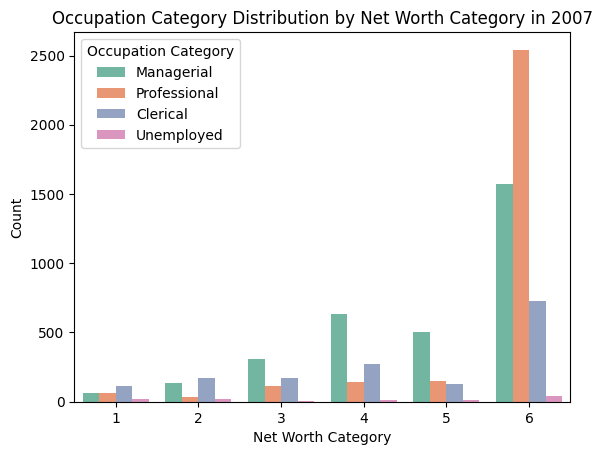

In [29]:
sns.countplot(x='INCCAT07', hue='OCCAT107', data=dataset2, palette='Set2')
plt.title('Occupation Category Distribution by Net Worth Category in 2007')
plt.xlabel('Net Worth Category')
plt.ylabel('Count')
plt.legend(title='Occupation Category', labels=['Managerial', 'Professional', 'Clerical', 'Unemployed'])
plt.show()


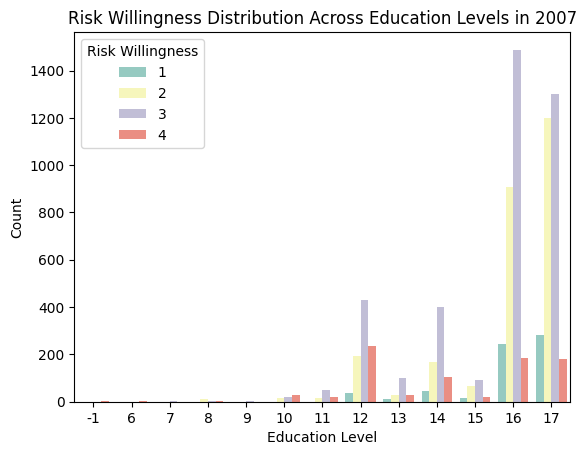

In [30]:
sns.countplot(x='EDUC07', hue='RISK07', data=dataset2, palette='Set3')
plt.title('Risk Willingness Distribution Across Education Levels in 2007')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Risk Willingness')
plt.show()


Text(0.5, 1.0, 'Bar plot: Risk Tolerance vs Married life in 2009')

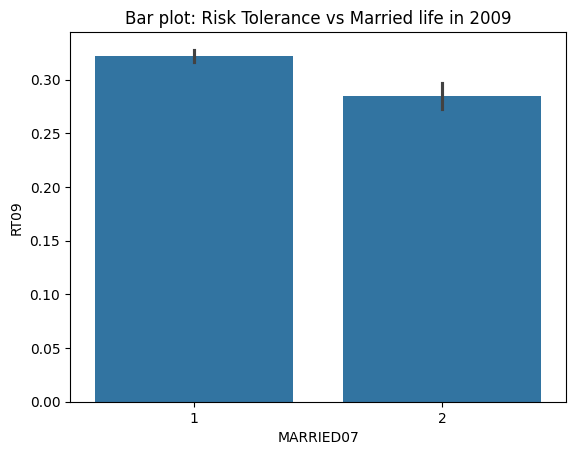

In [31]:
sns.barplot(x='MARRIED07', y='RT09', data=dataset2)
plt.title('Bar plot: Risk Tolerance vs Married life in 2009')

Text(0.5, 1.0, 'Line plot: Risk Tolerance vs Age in 2007')

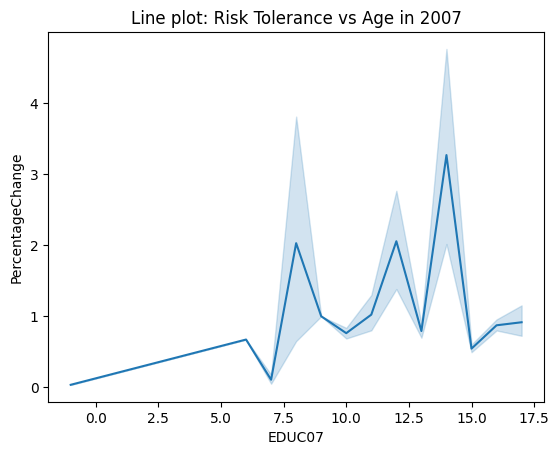

In [32]:
sns.lineplot(x='EDUC07', y='PercentageChange', data=dataset2)
plt.title('Line plot: Risk Tolerance vs Age in 2007')

In [33]:
# sns.heatmap(dataset2)
#  v ery ugly heatmap

In [34]:
dataset3 = copy.deepcopy(dataset2)

Clearly, the behavior of the individuals reversed in 2009 after crisis and majority of the investment was in risk free assets. Overall risk tolerance decreased, which is shown by majority of risk tolerance being close to 0 in 2009.
In the next step we pick the intelligent investors whose risk tolerance change between 2007 and 2009 was less than 10%

In [35]:
dataset3 = dataset3[dataset3['PercentageChange']<=.1]

We assign the true risk tolerance as the average risk tolerance of these intelligent investors between 2007 and 2009. This is the predicted variable for this case study. The purpose would be to predict the true risk tolerance of an individuals given the demographic, financial and willingness to take risk related features.

In [36]:
dataset3['TrueRiskTolerance'] = (dataset3['RT07'] + dataset3['RT09'])/2

Let us drop other labels which might not be needed for the prediction.

In [37]:
dataset3.drop(labels=['RT07', 'RT09'], axis=1, inplace=True)
dataset3.drop(labels=['PercentageChange'], axis=1, inplace=True)

<a id='2.2'></a>
## 3.2. Feature Selection-Limit the Feature Space

<a id='2.2.2'></a>
### 3.2.2.  Features elimination

In order to filter the features further we do the following:
1. Check the description in the Data Dictionary (https://www.federalreserve.gov/econres/files/codebk2009p.txt, https://www.federalreserve.gov/econresdata/scf/files/fedstables.macro.txt)and only keep the features that are intuitive
The description is as follows:


* AGE: There are 6 age categories, where 1 represents age less than 35 and 6 represents age more than 75.
* EDUC: There are 4 education categories, where 1 represents no high school and 4 represents college degree.
* MARRIED: It represents marital status. There are two categories where 1 represents married and 2 represents unmarried.
* OCCU: It represents occupation category. 1 represents managerial category and 4 represents unemployed.
* KIDS: It represents number of kids.
* NWCAT: It represents net worth category. There are 5 categories, where 1 net worth less than 25 percentile and 5 represents net worth more than 90th percentile.
* INCCL: It represents income category. There are 5 categories, where 1 income less than 10,000 and 5 represents net worth more than 100,000
* RISK: It represents the willingness to take risk on a scale of 1 to 4, where 1 represents highest level of willingness to take risk.

2. Keep only the intuitive factors as of 2007 only and remove all the intermediate features and features related to 2009, as the variables of 2007 are the only ones required for predicting the risk tolerance.


In [38]:
keep_list2 = ['AGE07','EDCL07','MARRIED07','KIDS07','OCCAT107','INCOME07','RISK07','NETWORTH07','TrueRiskTolerance'
]

drop_list2 = [col for col in dataset3.columns if col not in keep_list2]

dataset3.drop(labels=drop_list2, axis=1, inplace=True)

Let us look at the correlation among the features.

<Axes: title={'center': 'Correlation Matrix'}>

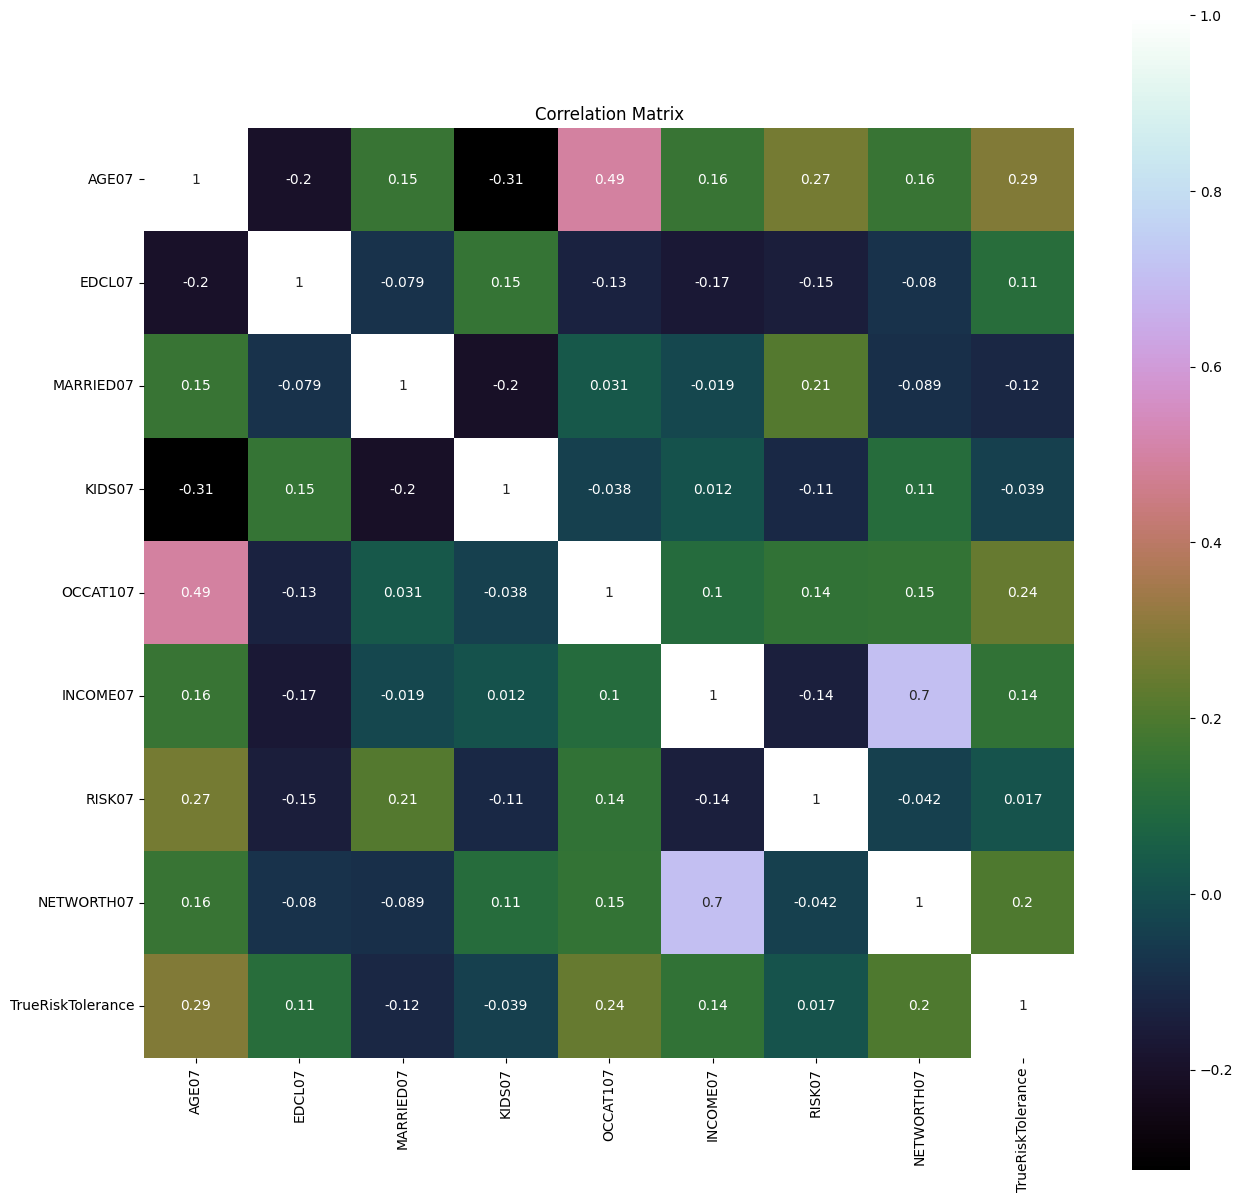

In [39]:
# correlation
correlation = dataset3.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

<Figure size 1500x1500 with 0 Axes>

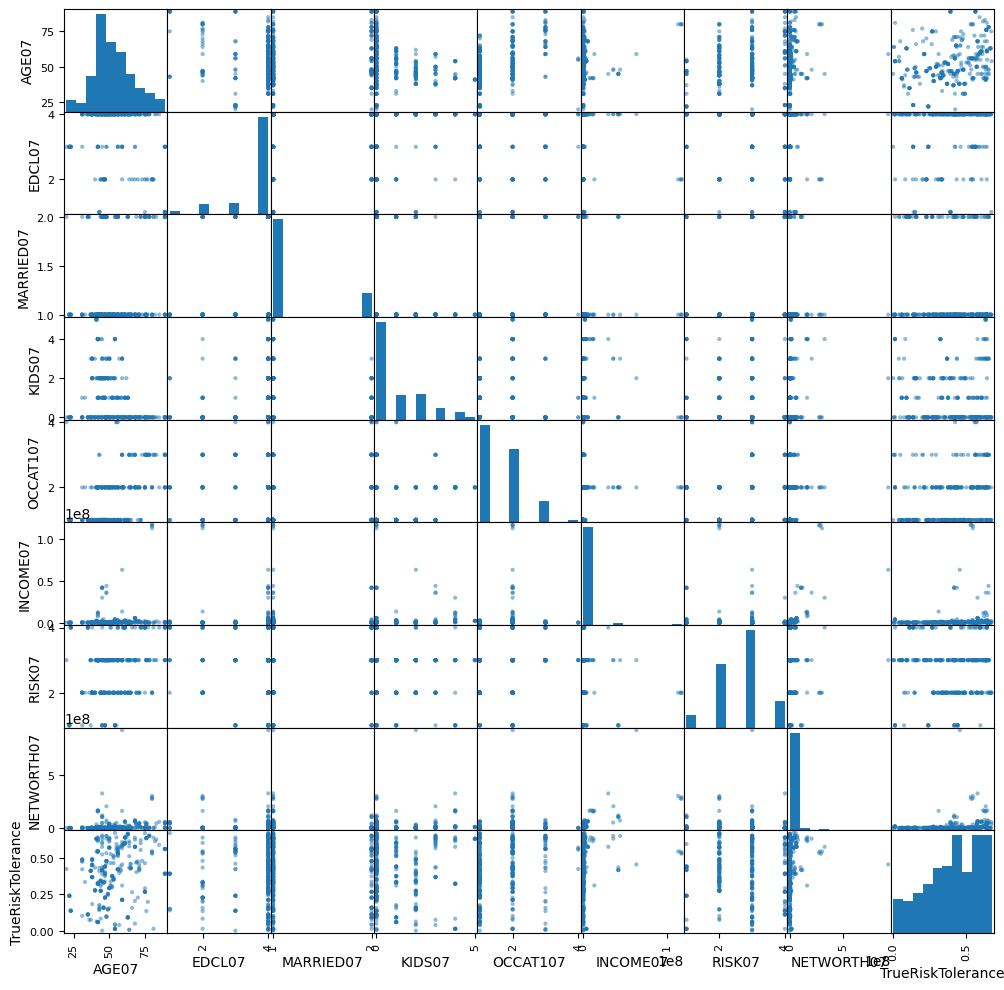

In [40]:
# Scatterplot Matrix
from pandas.plotting import scatter_matrix
plt.figure(figsize=(15,15))
scatter_matrix(dataset3,figsize=(12,12))
plt.show()

Looking at the correlation chart above, networth and income are positively correlated with the risk tolerance.
With more number of kids and marriage the risk tolerance decreases. As the willingness to take risk decreases the risk tolerance decreases. With age there is a positive relationship of the risk tolerance.

As per the paper "Does Risk Tolerance Decrease With Age?(Hui Wang1,Sherman Hanna)", Relative risk aversion decreases as people age (i.e., the proportion of net wealth invested in risky assets increases as people age) when other variables are held constant.Therefore, risk tolerance increases with age.

So, in summary all the variables and their relationship with risk tolerance seems intuitive.

<a id='4'></a>
# 4. Evaluate Algorithms and Models

Let us evaluate the algorithms and the models.

<a id='4.1'></a>
## 4.1. Train Test Split

Performing a train and test split in this step.

In [41]:


def auto_scale_features(X):
    scaler = StandardScaler()
    numeric_cols = X.select_dtypes(include=np.number).columns.tolist()

    # Scale numeric columns
    X[numeric_cols] = scaler.fit_transform(X[numeric_cols])
    return X


def auto_transform_features(X):
    numeric_cols = X.select_dtypes(include=np.number).columns.tolist()

    for col in numeric_cols:
        skewness = X[col].skew()
        # Apply log transformation if skewness is high
        if abs(skewness) > 0.75:
            X[col] = np.log1p(X[col])
    return X



def auto_handle_imbalance(X, y):
    if y.dtype == 'object' or len(np.unique(y)) <= 20:  # Assuming classification if target is object or few unique vals
        imbalance_ratio = y.value_counts().max() / y.value_counts().min()

        if imbalance_ratio > 2:  # Consider imbalance if max class count is more than twice the min class count
            smote = SMOTE()
            X_res, y_res = smote.fit_resample(X, y)
            return pd.DataFrame(X_res, columns=X.columns), pd.Series(y_res)
    # Return original data if no imbalance handling is needed or if regression
    return X, y

In [55]:
Y= dataset3["TrueRiskTolerance"]
X = dataset3.loc[:, dataset3.columns != 'TrueRiskTolerance']

# Auto-scale features
X_scaled = auto_scale_features(X.copy())

# Auto-transform features
X_transformed = auto_transform_features(X_scaled.copy())

# Handle imbalance (for classification)
X_balanced1, y_balanced = auto_handle_imbalance(X_transformed.copy(), Y.copy())


In [56]:
from sklearn.impute import SimpleImputer

# Impute missing values with the median of each column
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_balanced1)
X_balanced = pd.DataFrame(X_train_imputed, columns=X_balanced1.columns)


In [57]:
X_balanced.isna().sum()

AGE07         0
EDCL07        0
MARRIED07     0
KIDS07        0
OCCAT107      0
INCOME07      0
RISK07        0
NETWORTH07    0
dtype: int64

In [58]:
# split out validation dataset for the end

# scaler = StandardScaler().fit(X)
# rescaledX = scaler.transform(X)
validation_size = 0.2
seed = 3
X_train, X_validation, Y_train, Y_validation = train_test_split(X_balanced, y_balanced, test_size=validation_size, random_state=seed)

<a id='4.2'></a>
## 4.2. Test Options and Evaluation Metrics


In [59]:
# test options for regression
num_folds = 10
#scoring = 'neg_mean_squared_error'
#scoring ='neg_mean_absolute_error'
scoring = 'r2'

<a id='4.3'></a>
## 4.3. Compare Models and Algorithms

### Regression Models

In [60]:
# spot check the algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
#Neural Network
#models.append(('MLP', MLPRegressor()))
#Ensable Models
# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

In [61]:
# pip install catboost


In [62]:
# pip install xgboost



In [63]:


models.extend([
    ('Ridge', Ridge()),
    ('BayesianRidge', BayesianRidge()),

    ('XGB', XGBRegressor(objective='reg:squarederror')),
    ('CatBoost', CatBoostRegressor(logging_level='Silent')),
    # Example of stacking models:
    # The `final_estimator` could be any regressor (e.g., linear regression, gradient boosting regressor, etc.)
    ('Stacking', StackingRegressor(estimators=[('LR', LinearRegression()), ('RF', RandomForestRegressor())], final_estimator=GradientBoostingRegressor()))
])

# Note: For some models like CatBoost, logging_level='Silent' is used to minimize verbose output during training.


### K-folds cross validation

In [64]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, shuffle=True)
    #converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -0.130679 (0.081006)
LASSO: 0.042244 (0.059864)
EN: 0.022477 (0.029992)
KNN: -0.415957 (0.150548)
CART: -0.486136 (0.213610)
SVR: -0.431727 (0.073667)
ABR: -0.411999 (0.105002)
GBR: -0.609488 (0.271791)
RFR: -0.712970 (0.098946)
ETR: -0.724854 (0.129675)
Ridge: -0.104441 (0.098136)
BayesianRidge: -0.123795 (0.077823)
XGB: -0.656419 (0.198649)
CatBoost: -0.735423 (0.126941)
Stacking: -0.628012 (0.171450)


### Algorithm comparison

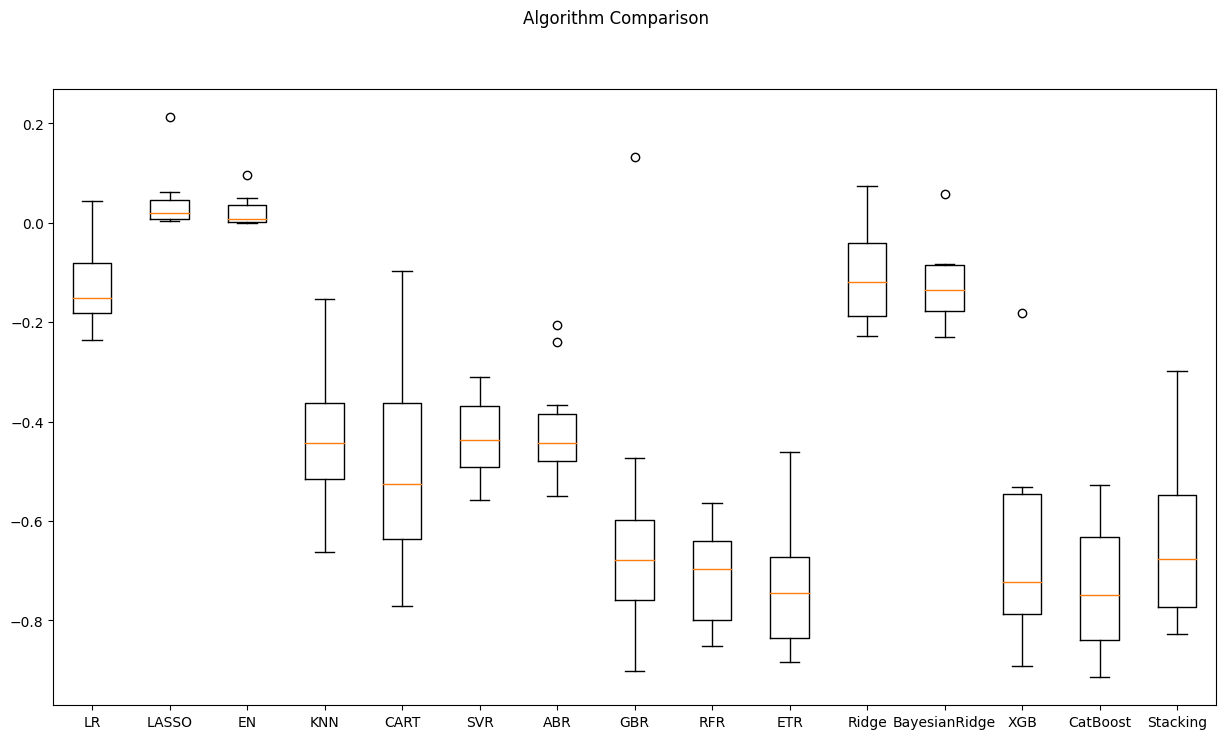

In [65]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
plt.show()

In [67]:
from time import time
import psutil
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
# Expanded results list to include more metrics and execution time
extended_results = []

for name, model in models:
    start_time = time()
    process = psutil.Process()  # Get the current process
    initial_memory = process.memory_info().rss / (1024 * 1024)  # Memory usage in MB

    kfold = KFold(n_splits=num_folds, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)

    execution_time = time() - start_time
    memory_used = process.memory_info().rss / (1024 * 1024) - initial_memory  # Calculate memory usage increase

    mse_scores = -1 * cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='r2')

    extended_results.append((name, np.mean(cv_results), np.std(cv_results),
                             np.mean(mse_scores), np.mean(r2_scores),
                             execution_time, memory_used))

# Convert results to a DataFrame for easier manipulation and visualization

results_df = pd.DataFrame(extended_results, columns=['Model', 'Mean CV Score', 'Std CV Score',
                                                     'Mean MSE', 'Mean R2', 'Execution Time (s)', 'Memory Used (MB)'])


In [68]:
extended_results

[('LR',
  0.07283043314044922,
  0.149359118924122,
  0.027812945962264395,
  0.096347633165038,
  0.10110592842102051,
  0.0),
 ('LASSO',
  -0.05047559289261259,
  0.04011463915063734,
  0.03319631559165551,
  -0.07066516283182947,
  0.06716799736022949,
  0.0),
 ('EN',
  -0.04611523679125105,
  0.05462142973899359,
  0.033215809726460724,
  -0.04024503708639138,
  0.10445356369018555,
  0.0),
 ('KNN',
  0.3496472426887725,
  0.19875861402792608,
  0.018504257424859637,
  0.3804968960351899,
  0.19755029678344727,
  0.0),
 ('CART',
  0.4722580117584386,
  0.32555525742149916,
  0.016284205770582174,
  0.594802868172635,
  0.18639111518859863,
  0.0),
 ('SVR',
  0.4263834213975738,
  0.15006352178799134,
  0.018181787124358802,
  0.39500014579575354,
  0.29314112663269043,
  0.0),
 ('ABR',
  0.40085224724315766,
  0.09574209217130061,
  0.01914944355544536,
  0.3955420545107146,
  1.9411163330078125,
  0.0),
 ('GBR',
  0.6532944087896981,
  0.1801769997948104,
  0.010417200545366925,
 

In [69]:


# Plot for Mean CV Score
fig = px.bar(results_df, x='Model', y='Mean CV Score', error_y='Std CV Score',
             hover_data=['Mean MSE', 'Mean R2', 'Execution Time (s)', 'Memory Used (MB)'],
             title="Model Performance Comparison")
fig.show()

# Plot for Execution Time
fig = px.bar(results_df, x='Model', y='Execution Time (s)',
             hover_data=['Mean CV Score', 'Mean MSE', 'Mean R2', 'Memory Used (MB)'],
             title="Model Execution Time Comparison")
fig.show()


In [73]:
from time import time
import psutil
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from math import sqrt

# Initialize an empty list to hold all metrics for each model
model_metrics = []

for name, model in models:
    start_time = time()
    process = psutil.Process(os.getpid())
    initial_memory = process.memory_info().rss / (1024 * 1024)  # Convert bytes to MB

    # Evaluate model
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
    mse = -cv_results.mean()
    rmse = sqrt(mse)
    r2 = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='r2').mean()

    # Measure time and memory usage
    elapsed_time = time() - start_time
    final_memory = process.memory_info().rss / (1024 * 1024)  # Convert bytes to MB
    memory_usage = final_memory - initial_memory

    # Store metrics
    model_metrics.append((name, mse, rmse, r2, elapsed_time, memory_usage))

# Convert the metrics into a DataFrame for easier handling
metrics_df = pd.DataFrame(model_metrics, columns=['Model', 'MSE', 'RMSE', 'R2', 'Time (s)', 'Memory Usage (MB)'])


In [74]:


print(tabulate(metrics_df, headers='keys', tablefmt='grid'))


+----+---------------+------------+-----------+------------+------------+---------------------+
|    | Model         |        MSE |      RMSE |         R2 |   Time (s) |   Memory Usage (MB) |
+====+===============+============+===========+============+============+=====================+
|  0 | LR            | 0.0283617  | 0.168409  |  0.0622579 |  0.150038  |            0        |
+----+---------------+------------+-----------+------------+------------+---------------------+
|  1 | LASSO         | 0.0330788  | 0.181876  | -0.0611704 |  0.142364  |            0        |
+----+---------------+------------+-----------+------------+------------+---------------------+
|  2 | EN            | 0.032961   | 0.181552  | -0.0297782 |  0.186368  |            0        |
+----+---------------+------------+-----------+------------+------------+---------------------+
|  3 | KNN           | 0.0198571  | 0.140915  |  0.349231  |  0.171916  |            0        |
+----+---------------+------------+-----

In [75]:

# Initialize a figure
fig = go.Figure()

# Assuming metrics_df is your DataFrame with model names and their metrics
metrics = ['MSE', 'RMSE', 'R2', 'Time (s)', 'Memory Usage (MB)']

# Add traces for each metric, but only make MSE visible initially
for metric in metrics:
    for index, row in metrics_df.iterrows():
        fig.add_trace(go.Bar(x=[row['Model']], y=[row[metric]], name=metric,
                             visible=(metric == 'MSE')))

# Create buttons for the interactive component
buttons = []

for metric in metrics:
    buttons.append(dict(method='update',
                        label=metric,
                        args=[{'visible': [m == metric for m in metrics for _ in metrics_df['Model']],
                               'title': f"Model Comparison - {metric}",
                               'showlegend': True}]))

# Update the layout to add buttons
fig.update_layout(
    updatemenus=[
        dict(type="dropdown",
             direction="down",
             x=0.5,
             xanchor="center",
             y=1.15,
             yanchor="top",
             buttons=buttons)],
    title='Model Comparison - MSE',
)

fig.show()


The non linear models perform better than the linear models, which means that a non linear relationship between the risk tolerance and the difference variables use to predict it. Given random forest regression is one of the best methods, we use it for further grid search.

#Model Performance Analysis

##Accuracy and Error Metrics:

-Top Performers: The Extra Trees Regressor (ETR) and Random Forest Regressor (RFR) models show the best performance in terms of both lower MSE and RMSE values, and higher R² scores. This indicates a strong ability to predict the target variable with minimal error and high determination coefficient, respectively.

-Gradient Boosting Models: Both Gradient Boosting Regressor (GBR) and XGBoost (XGB) also perform well, with low error metrics and high R² scores. These models are known for handling non-linear data effectively, which seems to be beneficial for this dataset.

-Linear Models: Linear models like Linear Regression (LR), Lasso (LASSO), ElasticNet (EN), and Ridge show higher error metrics and lower R² scores compared to tree-based models. This suggests that the dataset might have non-linear relationships that linear models struggle to capture.

##Execution Time:

-Fastest Models: Simple models like LR, LASSO, and EN are among the fastest in terms of execution time, but their accuracy is compromised.
Slowest Models: The Stacking model takes the longest time to execute. However, it does not significantly outperform the simpler models like ETR and RFR in terms of accuracy, which raises questions about its efficiency for this particular dataset.

-Balance Between Speed and Accuracy: RFR and ETR not only provide high accuracy but also maintain a reasonable balance in execution time, making them efficient choices for this dataset.

##Memory Usage:

The memory usage is reported as 0 for most models, which could indicate that the increase in memory usage was minimal or not captured accurately. However, the Stacking model and CatBoost show some memory usage, with CatBoost being particularly high. This could be important in scenarios where computational resources are limited.

##Conclusions and Recommendations:
Choice of Model: For datasets with complex, non-linear relationships, tree-based models, especially ensemble methods like Random Forest and Extra Trees, provide a good balance of accuracy and execution efficiency. Gradient boosting models like GBR and XGBoost are also highly effective but may require more computational resources.

Model Complexity vs. Performance: While stacking can potentially improve model performance by combining the predictions of multiple models, it significantly increases the complexity, execution time, and resource usage. It's crucial to evaluate whether the performance gain justifies the additional complexity and resource demand.

Resource Management: In scenarios where execution speed and memory usage are critical, preference should be given to models that offer a good balance between resource usage and prediction accuracy. The Random Forest and Extra Trees models stand out in this regard.


<a id='5'></a>
# 5. Model Tuning and Grid Search

Given that the Random Forest is the best model, Grid Search is performed on Random Forest.

In [76]:
# param_grid = {
#     'n_estimators': [100, 200, 300, 400, 500],  # Number of trees in the forest
#     'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
#     'min_samples_split': [2, 5, 10, 15],  # Minimum number of samples required to split an internal node
#     'min_samples_leaf': [1, 2, 4, 6],  # Minimum number of samples required to be at a leaf node
#     'max_features': ['auto', 'sqrt', 'log2', None],  # Number of features to consider when looking for the best split
#     'bootstrap': [True, False],  # Whether bootstrap samples are used when building trees
#     'max_samples': [None, 0.5, 0.75, 0.9]  # If bootstrap is True, the number of samples to draw from X to train each base estimator
# }
param_grid = {
    'n_estimators': [100, 300, 500],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 15],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto'],  # Number of features to consider when looking for the best split
    'bootstrap': [True],  # Whether bootstrap samples are used when building trees
    'max_samples': [None, 0.5, 0.75, 0.9]  # If bootstrap is True, the number of samples to draw from X to train each base estimator
}

# Note: The `max_samples` parameter is only used if `bootstrap` is True.


In [77]:


# Define a function to calculate RMSE
def rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

# Create scorers dictionary
scoring = {'MSE': make_scorer(mean_squared_error, greater_is_better=False),
           'RMSE': make_scorer(rmse, greater_is_better=False),
           'R2': 'r2'}

# Initialize the model
model = ExtraTreesRegressor()

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, refit='R2', cv=5, verbose=3, return_train_score=True)

# Fit the grid search to the data
grid_result = grid_search.fit(X_train, Y_train)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV 1/5] END bootstrap=True, max_depth=None, max_features=auto, max_samples=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; MSE: (train=-0.001, test=-0.010) R2: (train=0.955, test=0.710) RMSE: (train=-0.038, test=-0.099) total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=None, max_features=auto, max_samples=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; MSE: (train=-0.001, test=-0.016) R2: (train=0.964, test=0.559) RMSE: (train=-0.034, test=-0.125) total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=None, max_features=auto, max_samples=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; MSE: (train=-0.002, test=-0.005) R2: (train=0.944, test=0.832) RMSE: (train=-0.042, test=-0.074) total time=   0.2s
[CV 4/5] END bootstrap=True, max_depth=None, max_features=auto, max_samples=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; MSE: (train=-0.002, test

<a id='6'></a>
# 6. Finalise the Model

Finalize Model with best parameters found during tuning step.

<a id='6.1'></a>
## 6.1. Results on the Test Dataset

In [78]:
# Display the best parameters and corresponding score
print(f"Best parameters: {grid_result.best_params_}")
print(f"Best R2 score from CV: {grid_result.best_score_}")

# Evaluate on the validation set with best estimator
best_model = grid_result.best_estimator_
predictions = best_model.predict(X_validation)

# Calculate metrics on the validation set
mse = mean_squared_error(Y_validation, predictions)
rmse_val = sqrt(mse)
r2 = r2_score(Y_validation, predictions)

print(f"MSE on validation set: {mse}")
print(f"RMSE on validation set: {rmse_val}")
print(f"R2 score on validation set: {r2}")


Best parameters: {'bootstrap': True, 'max_depth': 50, 'max_features': 'auto', 'max_samples': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best R2 score from CV: 0.7354007835525969
MSE on validation set: 0.005925624829008228
RMSE on validation set: 0.07697808018525942
R2 score on validation set: 0.8183513316810705


In [79]:
a=grid_result.best_params_
print(a)

{'bootstrap': True, 'max_depth': 50, 'max_features': 'auto', 'max_samples': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


From the mean square error and R2 shown above for the test set, the results look good.

<a id='6.2'></a>
## 6.2. Feature Importance and Features Intuition

Looking at the details above Random forest be worthy of further study.
Let us look into the Feature Importance of the RF model

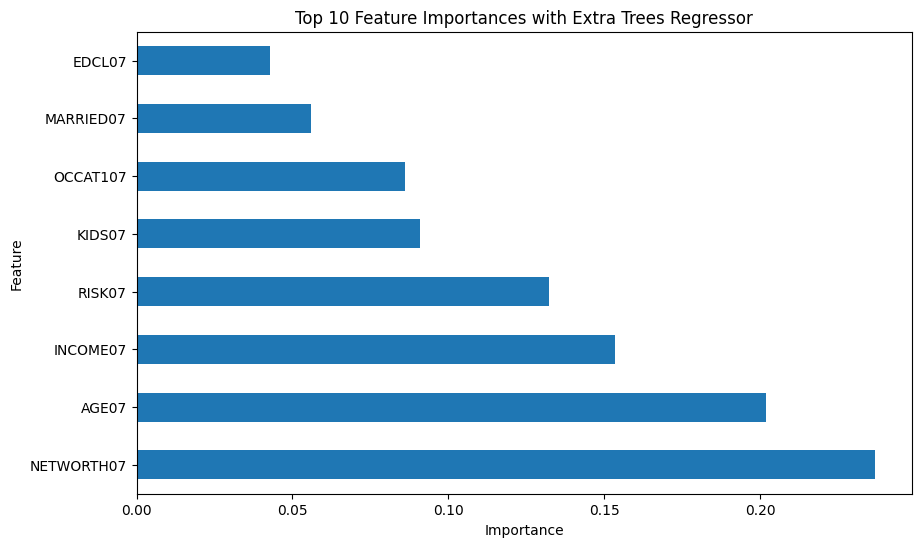

In [80]:

# Assuming `grid_result` is the result of your GridSearchCV execution
best_params = grid_result.best_params_

# Now using these best parameters to create and fit the Extra Trees Regressor
model = ExtraTreesRegressor(**best_params, n_jobs=-1, random_state=42)
model.fit(X_train, Y_train)

# Extracting feature importances
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)

# Plotting the top 10 most important features
plt.figure(figsize=(10, 6))
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances with Extra Trees Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


From the chart above, age, income, networth, and willingness to take risk are the key variables to decide the risk tolerance. These variables have been considered as the key variables to model the risk tolerance across several literature.

<a id='6.3'></a>
## 6.3. Save Model for Later Use

In [81]:
# Save Model Using Pickle


# save the model to disk
filename = 'finalized_model_extratree_with_de.sav'
dump(model, open(filename, 'wb'))

In [82]:
# load the model from disk
loaded_model = load(open(filename, 'rb'))
# estimate accuracy on validation set
predictions = loaded_model.predict(X_validation)
result = mean_squared_error(Y_validation, predictions)
print(r2_score(Y_validation, predictions))
print(result)

0.8190627224746835
0.0059024183007756114


__Conclusion__:

We showed that machine learning models might be able to objectively
analyze the behavior of different investors in a changing market and attribute these
changes to variables involved in determining risk appetite. With an increase in the
volume of investor’s data and availability of rich machine learning infrastructure,
such models might prove to be more useful.

We saw that there is a non-linear relationship between the variables and the risk tolerance. Income and net worth followed by age and willingness to take risk are the key variables to decide the risk tolerance. These variables have been considered as the key variables to model the risk tolerance across several literature.


# Trying/Experimenting the effect of Data Engineering( scaling, transformation, and Smote)